# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [2]:
import numpy as np
import pandas as pd

pandasInsuranceDataFrame = pd.read_csv('insurance.csv')
npMatrix = pandasInsuranceDataFrame.values[:,:]
print(type(npMatrix))
print()
print(npMatrix.shape)
print()
print(npMatrix)

<class 'numpy.ndarray'>

(1338, 7)

[[19 'female' 27.9 ... 'yes' 'southwest' 16884.924]
 [18 'male' 33.77 ... 'no' 'southeast' 1725.5523]
 [28 'male' 33.0 ... 'no' 'southeast' 4449.462]
 ...
 [18 'female' 36.85 ... 'no' 'southeast' 1629.8335]
 [21 'female' 25.8 ... 'no' 'southwest' 2007.945]
 [61 'female' 29.07 ... 'yes' 'northwest' 29141.3603]]


### Q2. Check whether there are missing values in this dataset.

In [4]:
print(pandasInsuranceDataFrame.shape)
pandasInsuranceDataFrame.isnull().sum()

(1338, 7)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 



age


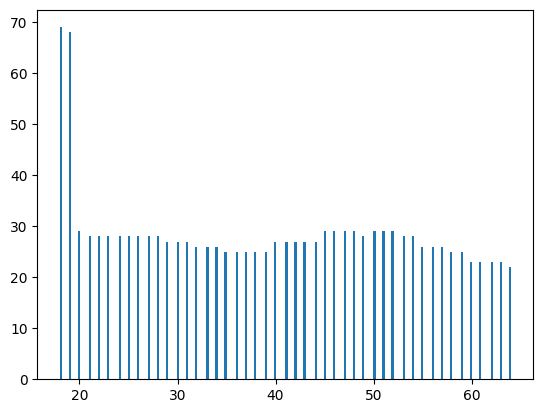


bmi


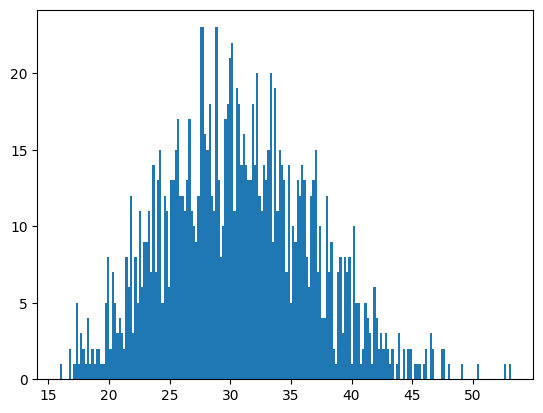


children


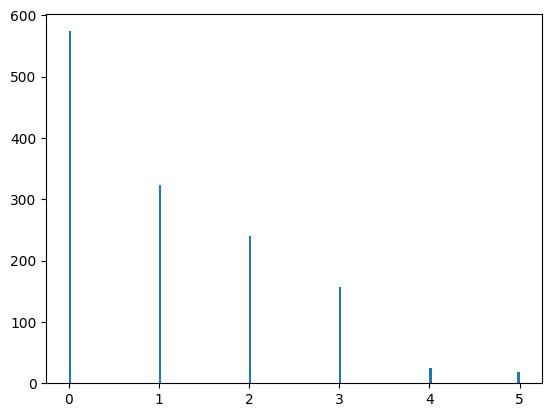


charges


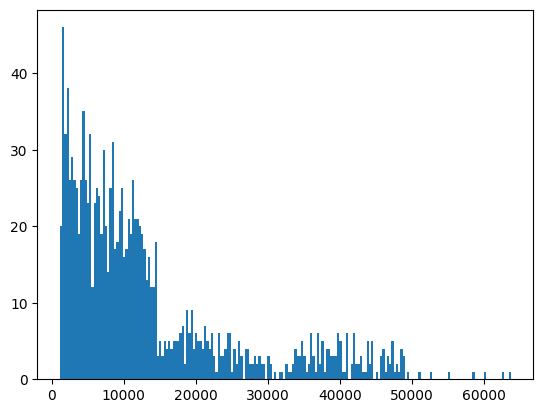

In [49]:
import matplotlib.pyplot as plt

def isCategorialFeature(c: str) -> bool:
    return c in {"sex", "smoker", "region"}

for feature in pandasInsuranceDataFrame:
    if not isCategorialFeature(feature):
        print("\n{}".format(feature))
        plt.hist(pandasInsuranceDataFrame[feature], 200)
        plt.show()

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [48]:
pandasInsuranceDataFrame.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

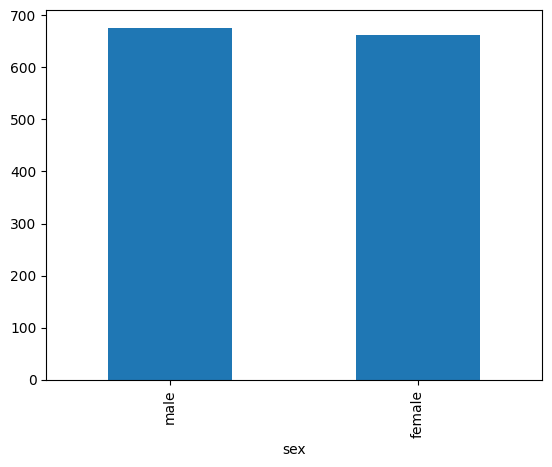

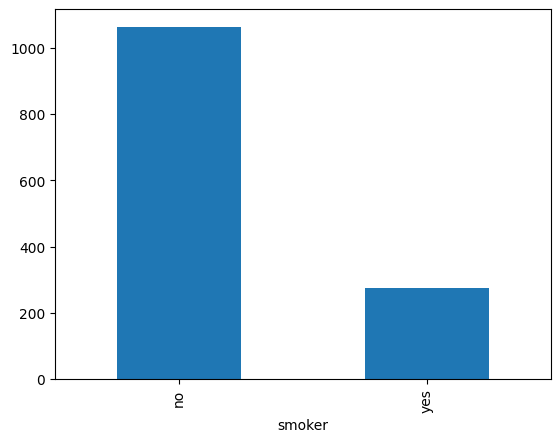

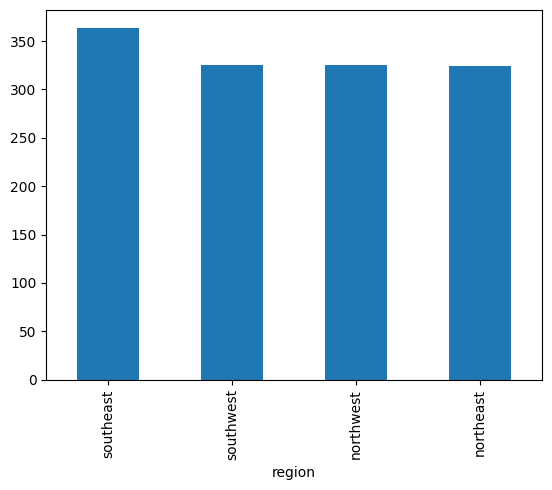

In [68]:
i = 100
for feature in pandasInsuranceDataFrame:
    if isCategorialFeature(feature):
        pandasInsuranceDataFrame[feature].value_counts().plot(kind = 'bar')
        plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder as le

encodedPIDF = pd.read_csv("insurance.csv")
labelEncoder = le()

for c in encodedPIDF:
    if isCategorialFeature(c):
        print("\n{}".format(encodedPIDF[c].value_counts()))
        encodedPIDF[c] = labelEncoder.fit_transform(encodedPIDF[c])
        print("\n{}".format(encodedPIDF[c].value_counts()))


sex
male      676
female    662
Name: count, dtype: int64

sex
1    676
0    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

smoker
0    1064
1     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


### Q7. Normalize all numerical features

In [87]:
numericPIDF = pd.read_csv('insurance.csv')
for feature in numericPIDF:
    if isCategorialFeature(feature):
        del numericPIDF[feature]

print("{}\n".format(numericPIDF))

x_mean = np.mean(numericPIDF, axis=0)
x_std = np.std(numericPIDF, axis=0)

print("mean\n{}\n".format(x_mean))
print("std\n{}\n".format(x_std))

numericPIDF = (numericPIDF-x_mean)/x_std
print("Z-Score normalized data\n{}\n".format(numericPIDF))



      age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]

mean
age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

std
age            14.044709
bmi             6.095908
children        1.205042
charges     12105.484976
dtype: float64

Z-Score normalized data
           age       bmi  children   charges
0    -1.438764 -0.453320 -0.908614  0.298584
1    -1.509965  0.509621 -0.078767 -0.953689
2    -0.797954  0.383307  1.580926 -0.728675
3    -0.441948 -1.305531 -0.908614  0

### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [89]:
numericPIDF.to_csv('ZScoreNormalizedNumericalData.csv', index=False)